# Insurance Claim Case Study

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats

from warnings import filterwarnings 
filterwarnings('ignore')

### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets  
### appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [252]:
Claims_Data=pd.read_csv(r'claims.csv')
Claims_Data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [253]:
Cust_Data=pd.read_csv(r'cust_demographics.csv')
Cust_Data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [254]:
Cust_Claims=pd.merge(left=Claims_Data,right=Cust_Data,left_on='customer_id',right_on='CUST_ID')
Cust_Claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


### 2. Perform a data audit for the datatypes and find out if there are any 
### mismatch within the current datatypes of the columns and their business significance.


In [255]:
Cust_Claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  CUST_ID              1085 non-null   int64  
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

In [256]:
Cust_Claims.claim_date=pd.to_datetime(Cust_Claims.claim_date,format='%m/%d/%Y')

In [257]:
Cust_Claims.DateOfBirth=pd.to_datetime(Cust_Claims.DateOfBirth,format='%d-%b-%y')

In [258]:
Cust_Claims.drop(columns=['CUST_ID'],inplace=True)

In [259]:
Cust_Claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   int64         
 1   customer_id          1085 non-null   int64         
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1020 non-null   object        
 8   total_policy_claims  1075 non-null   float64       
 9   fraudulent           1085 non-null   object        
 10  gender               1085 non-null   object        
 11  DateOfBirth          1085 non-null   datetime64[ns]
 12  State                1085 non-null   object        
 13  Contact              1085 non-nul

### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the  $ sign

In [260]:
Cust_Claims['claim_amount']=Cust_Claims['claim_amount'].astype('str')
Cust_Claims['claim_amount']=Cust_Claims['claim_amount'].str.strip("$")

In [261]:
Cust_Claims['claim_amount']=Cust_Claims['claim_amount'].astype('float')

In [262]:
Cust_Claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   int64         
 1   customer_id          1085 non-null   int64         
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1020 non-null   float64       
 8   total_policy_claims  1075 non-null   float64       
 9   fraudulent           1085 non-null   object        
 10  gender               1085 non-null   object        
 11  DateOfBirth          1085 non-null   datetime64[ns]
 12  State                1085 non-null   object        
 13  Contact              1085 non-nul

In [263]:
Cust_Claims.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver


### 4. Of all the injury claims, some of them have gone unreported with the police. 
### Create an alert flag (1,0) for all such claims.

In [264]:
Cust_Claims['Alert_Flag']=np.where(Cust_Claims['police_report']=='Yes',1,0)

In [265]:
Cust_Claims.tail()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Alert_Flag
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15,ND,459-425-4319,Platinum,1
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,1996-07-07,ID,529-462-1635,Silver,0
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11,WI,712-651-9613,Gold,1
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,2064-10-22,LA,469-345-5617,Silver,0
1084,63226031,61575264,Natural causes,2017-03-16,Auto,No,Material only,1490.0,1.0,No,Male,1995-07-12,WY,182-385-1392,Gold,0


### 5. One customer can claim for insurance more than once and in each claim,
### multiple categories of claims can be involved. However, customer ID should remain unique. 
### Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [266]:
Cust_Claims.drop_duplicates(subset='customer_id',keep='last',inplace=True)

In [267]:
Cust_Claims.duplicated().sum()

0

### 6. Check for missing values and impute the missing values with an appropriate value.
### (mean for continuous and mode for categorical)

In [268]:
Cust_Claims.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
Alert_Flag              0
dtype: int64

In [269]:
Mode=Cust_Claims['total_policy_claims'].mode()
Mode

0    1.0
Name: total_policy_claims, dtype: float64

In [270]:
# Categorical Variable

Cust_Claims.total_policy_claims.fillna(value=1.0,inplace=True)

In [271]:
# Continuous Variable

Cust_Claims.claim_amount.fillna(value=Cust_Claims.claim_amount.mean(),inplace=True)

In [272]:
Cust_Claims.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
Alert_Flag             0
dtype: int64

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
### Children < 18
### Youth 18-30
### Adult 30-60
### Senior > 60

In [273]:
Cust_Claims['Age']= dt.datetime.now().year - pd.DatetimeIndex(Cust_Claims['DateOfBirth']).year 

In [274]:
# Age is coming Negative
Cust_Claims.head(10)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Alert_Flag,Age
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,43
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,0,52
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,0,38
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0,36
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,Male,1977-05-13,NV,956-871-8691,Gold,0,45
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,Male,1977-05-17,NH,419-712-8513,Gold,0,45
10,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,Male,1999-03-02,AR,752-398-2914,Gold,0,23
11,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,Male,1999-10-25,AK,256-968-9172,Silver,0,23
12,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,Male,1993-10-12,ID,142-324-7481,Silver,0,29
13,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.5,2.0,Yes,Female,2066-09-09,RI,165-519-4583,Gold,0,-44


In [275]:
# Changing Date of Birth to Appropriate value

Cust_Claims['DateOfBirth']=np.where(Cust_Claims.DateOfBirth.dt.year.astype(int)>2022,Cust_Claims.DateOfBirth-pd.DateOffset(years=100),Cust_Claims.DateOfBirth)

In [276]:
Cust_Claims['Age']= dt.datetime.now().year - pd.DatetimeIndex(Cust_Claims['DateOfBirth']).year 

In [277]:
Cust_Claims.head(10)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Alert_Flag,Age
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,43
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,0,52
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,0,38
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0,36
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,Male,1977-05-13,NV,956-871-8691,Gold,0,45
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,Male,1977-05-17,NH,419-712-8513,Gold,0,45
10,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,Male,1999-03-02,AR,752-398-2914,Gold,0,23
11,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,Male,1999-10-25,AK,256-968-9172,Silver,0,23
12,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,Male,1993-10-12,ID,142-324-7481,Silver,0,29
13,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.5,2.0,Yes,Female,1966-09-09,RI,165-519-4583,Gold,0,56


In [278]:
Cust_Claims['Age_Group']=np.where(Cust_Claims.Age<18,'Children',np.where((Cust_Claims.Age>=18) & (Cust_Claims.Age<30),'Youth',np.where(Cust_Claims.Age>60,'Senior','Adult')))

In [279]:
Cust_Claims.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Alert_Flag,Age,Age_Group
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,43,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,0,52,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,0,38,Adult


### 8. What is the average amount claimed by the customers from various segments?

In [280]:
Cust_Claims.groupby('Segment')[['claim_amount']].mean()

,claim_amount
Segment,
Gold,12846.386178
Platinum,12371.644999
Silver,12267.146560


### 9. What is the total claim amount based on incident cause for all the claims that have been done 
### at least 20 days prior to 1st of October, 2018.

In [281]:
from datetime import timedelta

Req_df=pd.DataFrame(Cust_Claims)
End_Date='2018-10-01'
Start_Date=pd.to_datetime(End_Date,format='%Y-%m-%d')- timedelta(days=20)
Incident_Range=(Cust_Claims['claim_date'] >= Start_Date)  & (Cust_Claims['claim_date'] < End_Date)

Req_df=Req_df.loc[Incident_Range]


In [282]:
Req_df

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Alert_Flag,Age,Age_Group
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.000000,2.0,No,Male,1977-05-13,NV,956-871-8691,Gold,0,45,Adult
17,53780662,21240703,Other driver error,2018-09-19,Auto,Unknown,Material only,1050.000000,1.0,No,Male,1963-07-22,MD,473-561-2675,Silver,0,59,Adult
70,43973221,83290720,Driver error,2018-09-26,Auto,Yes,Material and injury,12501.489635,1.0,No,Male,1966-12-06,VA,185-825-6547,Gold,1,56,Adult
118,65335959,61810954,Other driver error,2018-09-19,Auto,Unknown,Material and injury,36620.000000,1.0,No,Male,1969-05-18,TX,724-493-6179,Silver,0,53,Adult
134,4112041,58402401,Other causes,2018-09-12,Auto,Unknown,Material and injury,32710.000000,1.0,No,Male,1979-06-13,KS,134-129-8167,Silver,0,43,Adult
148,74738945,88449349,Other causes,2018-09-12,Auto,No,Material only,1080.000000,1.0,No,Male,1979-12-17,WA,975-547-5196,Platinum,0,43,Adult
162,3589979,14490971,Crime,2018-09-19,Auto,No,Material only,1880.000000,4.0,No,Female,1976-12-10,MN,614-652-1274,Silver,0,46,Adult
193,17871003,98905793,Other driver error,2018-09-19,Auto,Unknown,Material only,3139.500000,3.0,Yes,Female,1993-11-11,ID,823-482-5839,Platinum,0,29,Youth
224,5694962,9677945,Other causes,2018-09-26,Auto,No,Material only,1520.000000,1.0,No,Female,1987-05-28,SC,849-461-6419,Platinum,0,35,Adult
305,2581621,18213216,Other causes,2018-09-12,Auto,Unknown,Material and injury,21942.000000,2.0,Yes,Male,1969-10-06,KY,416-461-9145,Silver,0,53,Adult


In [283]:
Req_df.groupby('incident_cause')[['claim_amount']].sum()

,claim_amount
incident_cause,
Crime,6840.000000
Driver error,14631.489635
Natural causes,8418.000000
Other causes,247257.489635
Other driver error,47599.500000


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [284]:
Driver_Issues=Cust_Claims[(Cust_Claims['incident_cause']=='Driver error') | (Cust_Claims['incident_cause']=='Other driver error')]

In [285]:
Driver_Issues

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Alert_Flag,Age,Age_Group
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,43,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,0,38,Adult
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,Male,1977-05-17,NH,419-712-8513,Gold,0,45,Adult
10,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,Male,1999-03-02,AR,752-398-2914,Gold,0,23,Youth
14,74165873,99103685,Other driver error,2018-01-13,Home,No,Material only,1495.0,1.0,Yes,Female,1985-12-30,KY,764-439-9856,Gold,0,37,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,28084004,82089910,Driver error,2018-06-03,Auto,No,Material only,2780.0,1.0,No,Male,1973-10-09,FL,257-248-4825,Silver,0,49,Adult
1078,47457836,6756905,Driver error,2017-01-21,Auto,No,Material only,2320.0,3.0,No,Male,1997-10-21,NE,924-427-8125,Silver,0,25,Youth
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15,ND,459-425-4319,Platinum,1,41,Adult
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11,WI,712-651-9613,Gold,1,32,Adult


In [286]:
Driver_State=Driver_Issues[(Driver_Issues['State']=='TX') | (Driver_Issues['State']=='DE') | (Driver_Issues['State']=='AK')]
Driver_State

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Alert_Flag,Age,Age_Group
39,70399158,26489135,Driver error,2017-07-01,Auto,No,Material only,1110.000000,1.0,No,Male,1994-10-05,DE,654-456-1493,Platinum,0,28,Youth
101,4506676,2632562,Other driver error,2018-05-14,Home,Unknown,Material only,1400.000000,1.0,No,Female,1985-12-14,AK,498-597-9658,Platinum,0,37,Adult
103,82144259,92752865,Driver error,2017-04-25,Auto,No,Injury only,12501.489635,1.0,No,Male,1986-01-30,AK,143-219-5498,Silver,0,36,Adult
118,65335959,61810954,Other driver error,2018-09-19,Auto,Unknown,Material and injury,36620.000000,1.0,No,Male,1969-05-18,TX,724-493-6179,Silver,0,53,Adult
147,26716331,3159546,Other driver error,2017-04-25,Auto,No,Injury only,17590.000000,4.0,No,Male,1987-10-20,TX,586-129-9752,Platinum,0,35,Adult
187,21550521,68772500,Driver error,2018-08-30,Auto,Unknown,Material only,2320.000000,1.0,No,Male,1989-11-10,TX,562-259-5432,Silver,0,33,Adult
188,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.489635,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,0,44,Adult
199,46572741,82415154,Other driver error,2017-06-11,Auto,No,Material and injury,15240.000000,1.0,No,Female,1980-03-08,DE,578-942-1542,Platinum,0,42,Adult
246,7238381,684748,Other driver error,2018-07-14,Auto,No,Material only,2920.000000,2.0,No,Male,1977-08-03,AK,613-385-2863,Gold,0,45,Adult
263,31574986,11321295,Driver error,2017-02-03,Auto,No,Material only,2460.000000,2.0,No,Male,1965-11-13,DE,429-596-2169,Platinum,0,57,Adult


In [287]:
Driver_StateAdult=Driver_State[(Driver_State['Age_Group']=='Adult')]
Driver_StateAdult.groupby('State')[['Age_Group']].count().rename(columns={'Age_Group':'Count'})

,Count
State,
AK,8
DE,10
TX,9


### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. 
### Represent the claim amount as a percentage on the pie chart.

In [288]:
Gender_SegAGG=pd.pivot_table(data=Cust_Claims,values='claim_amount',index='gender',columns='Segment',aggfunc=sum)
Gender_SegAGG

Segment,Gold,Platinum,Silver
gender,,,
Female,2.110042e+06,2.369720e+06,1.897302e+06
Male,2.655967e+06,2.096443e+06,2.347131e+06


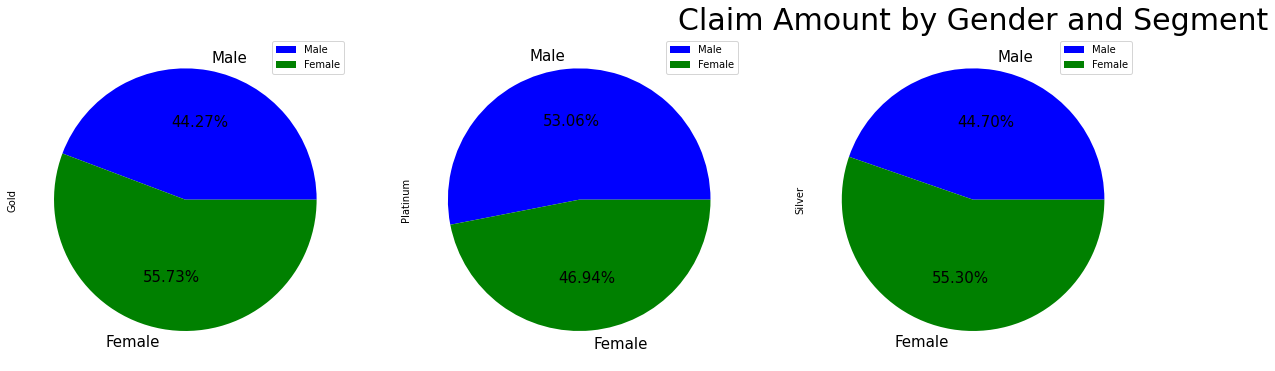

In [289]:
Gender_SegAGG.plot(kind='pie',subplots='true',labels=['Male','Female'],colors=['b','g'],autopct='%1.2f%%',
                   figsize=(20,10),fontsize=15)
plt.title('Claim Amount by Gender and Segment',fontsize=30)

plt.show()


### 12. Among males and females, which gender had claimed the most for any type of driver related issues? 
### E.g. This metric can be compared using a bar chart

In [290]:
# Driver Related Issues 
Driver_Issues

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Alert_Flag,Age,Age_Group
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,43,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,0,38,Adult
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,Male,1977-05-17,NH,419-712-8513,Gold,0,45,Adult
10,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,Male,1999-03-02,AR,752-398-2914,Gold,0,23,Youth
14,74165873,99103685,Other driver error,2018-01-13,Home,No,Material only,1495.0,1.0,Yes,Female,1985-12-30,KY,764-439-9856,Gold,0,37,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,28084004,82089910,Driver error,2018-06-03,Auto,No,Material only,2780.0,1.0,No,Male,1973-10-09,FL,257-248-4825,Silver,0,49,Adult
1078,47457836,6756905,Driver error,2017-01-21,Auto,No,Material only,2320.0,3.0,No,Male,1997-10-21,NE,924-427-8125,Silver,0,25,Youth
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15,ND,459-425-4319,Platinum,1,41,Adult
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11,WI,712-651-9613,Gold,1,32,Adult


In [291]:
Gender_Driver=Driver_Issues.groupby('gender')[['claim_amount']].sum()
Gender_Driver

,claim_amount
gender,
Female,3.136715e+06
Male,3.975408e+06


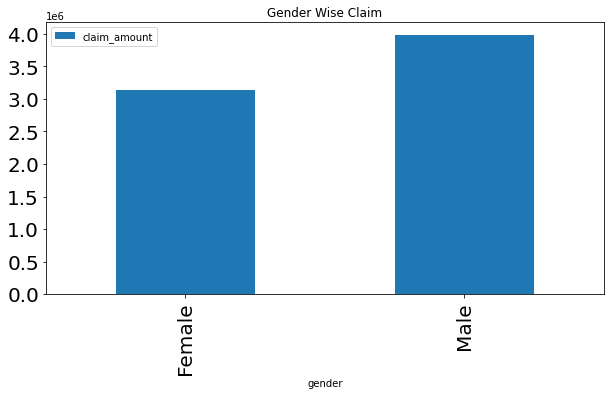

In [292]:
Gender_Driver.plot(kind='bar',figsize=(10,5),title='Gender Wise Claim',fontsize=20)
plt.show()

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [293]:
Fraud_Claims=Cust_Claims.loc[Cust_Claims['fraudulent']=='Yes']

In [294]:

Fraud_ClaimsGroup=Fraud_Claims.groupby(['Age_Group','fraudulent'])[['fraudulent']].count().rename(columns={'fraudulent':'Count'})
Fraud_ClaimsGroup

,,Count
Age_Group,fraudulent,
Adult,Yes,194
Senior,Yes,12
Youth,Yes,39


<AxesSubplot:title={'center':'Fraudulent Claims according to Age Group'}, xlabel='Age_Group,fraudulent', ylabel='Count'>

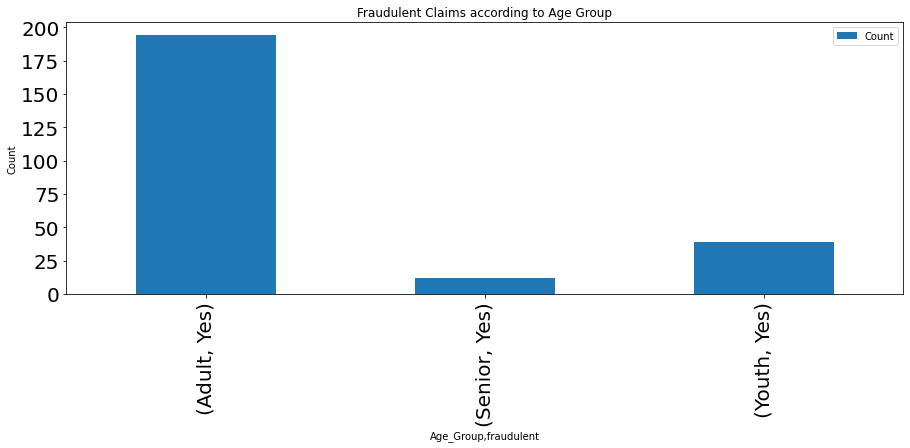

In [295]:
Fraud_ClaimsGroup.plot(kind='bar',ylabel='Count',title='Fraudulent Claims according to Age Group',figsize=(15,5),fontsize=20)

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers.
### Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [339]:
Cust_Claims['Month']=Cust_Claims.claim_date.apply(lambda x:pd.Timestamp.strftime(x,format='%m'))

In [340]:
Cust_Claims['Year']=Cust_Claims['claim_date'].dt.year

In [341]:
Month_Claim=Cust_Claims.groupby(['Year','Month'])[['claim_amount']].sum()

Month_Claim=Month_Claim.sort_values(by=['Year','Month'],ascending=[True,True])
Month_Claim

claim_amount
Year Month               
2017 01     608015.468904
     02     631455.979269
     03     615575.979269
     04     749415.489635
     05     546740.968904
     06     560143.489635
     07     790867.958539
     08     431615.979269
     09     459467.427443
     10     608988.468904
     11     601186.979269
     12     694252.489635
2018 01     719153.458539
     02     533085.479269
     03     704672.968904
     04     544537.989635
     05     567718.448174
     06     717205.448174
     07     588445.948174
     08     479680.489635
     09     523730.468904
     10     800648.448174

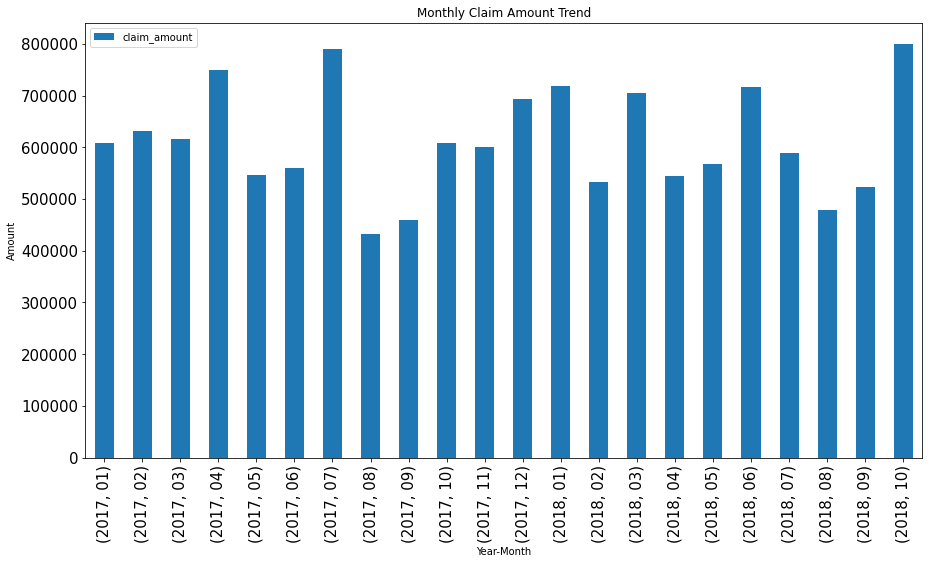

In [342]:
Month_Claim.plot(kind='bar',ylabel='Amount',xlabel='Year-Month',title='Monthly Claim Amount Trend',figsize=(15,8),fontsize=15)
plt.show()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using 
### a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [305]:
Avg_claim=pd.pivot_table(data=Cust_Claims,index=["Age_Group","gender"],columns=['fraudulent'],
                                       values='claim_amount',aggfunc='mean')
Avg_claim

fraudulent                  No           Yes
Age_Group gender                            
Adult     Female  12122.306252  12199.746714
          Male    12305.975968  15747.044826
Senior    Female  13782.965511   4387.888889
          Male    13766.190476  28232.500000
Youth     Female  13174.536397   9220.450407
          Male    12089.533384   7799.610535

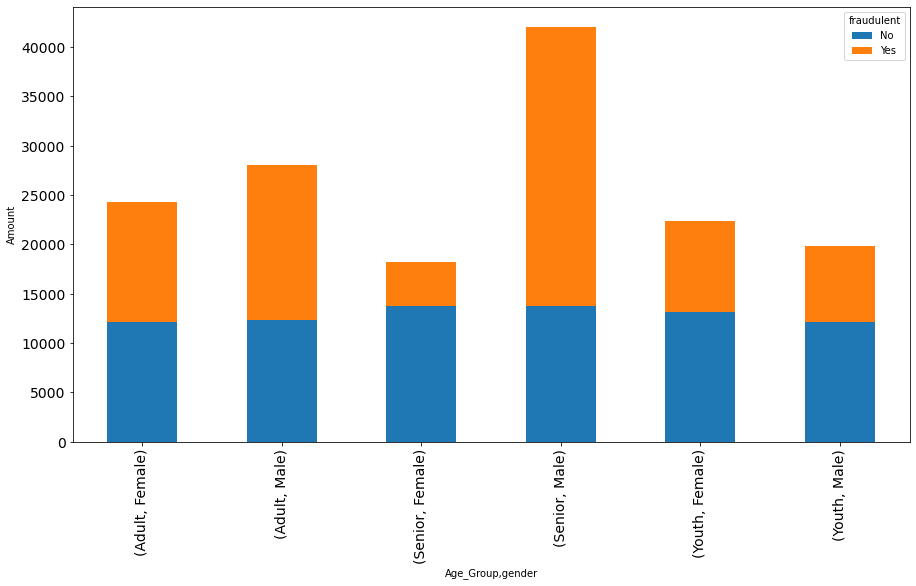

In [306]:
claim_amount_gender_age.plot(kind='bar',stacked=True,ylabel='Amount',figsize=(15,8),fontsize=14)
plt.show()

### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. 
### Please include a detailed write-up on the parameters taken into consideration, the Hypothesis 
### testing steps, conclusion from the p-values and the business implications of the statements.

### 16. Is there any similarity in the amount claimed by males and females?


#### Hypothesis defined and Test used:

In [307]:
Claims_byMale=Cust_Claims['claim_amount'].loc[Cust_Claims['gender']=='Male']
Claims_byFemale=Cust_Claims['claim_amount'].loc[Cust_Claims['gender']=='Female']

In [308]:
Claims_byMale.mean()

12884.829631308425

In [309]:
Claims_byFemale.mean()

12100.692029236623

In [310]:
Ind_Test=stats.ttest_ind(a=Claims_byMale,b=Claims_byFemale)
Ind_Test

Ttest_indResult(statistic=0.9630529881732577, pvalue=0.3357373087404285)

#### Conclusion:

### 17. Is there any relationship between age category and segment?

##### Hypothesis defined and Test used:

In [311]:
Segment_Agegroup=pd.crosstab(Cust_Claims['Age_Group'],Cust_Claims['Segment'],margins=True)
Segment_Agegroup

Segment,Gold,Platinum,Silver,All
Age_Group,,,,
Adult,285,275,261,821
Senior,15,17,17,49
Youth,71,69,68,208
All,371,361,346,1078


In [312]:
Chi_Test=stats.chi2_contingency(Segment_Agegroup)
Chi_Test

(0.40933704825647454,
 0.9999871661088807,
 9,
 array([[ 282.55194805,  274.93599258,  263.51205937,  821.        ],
        [  16.86363636,   16.40909091,   15.72727273,   49.        ],
        [  71.58441558,   69.65491651,   66.7606679 ,  208.        ],
        [ 371.        ,  361.        ,  346.        , 1078.        ]]))

In [313]:
Chi_statisticsvalue=Chi_Test[0]
Chi_statisticsvalue

0.40933704825647454

In [314]:
p_value=Chi_Test[1]
p_value


0.9999871661088807

#### Conclusion:

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

#### Hpothesis Defined & Test Used:

In [315]:
Claims_byYear=Cust_Claims.groupby(['Year'])[['claim_amount']].sum()
Claims_byYear

,claim_amount
Year,
2017,7.297727e+06
2018,6.178879e+06


In [316]:
Claim_by2018=Cust_Claims.claim_amount[Cust_Claims.Year==2018]
Claim_by2018

1        2980.0
3        1950.0
7        2240.0
9       36810.0
10       1730.0
         ...   
1073     2730.0
1074    33330.0
1075     2780.0
1077     2290.0
1080     1770.0
Name: claim_amount, Length: 484, dtype: float64

In [317]:
stats.ttest_1samp(Claim_by2018,10000)

Ttest_1sampResult(statistic=4.508441689457533, pvalue=8.205144389110108e-06)

#### Conclusion

### 19. Is there any difference between age groups and insurance claims?

#### Hpothesis Define and Test used:

In [318]:
Age_Group1 = Cust_Claims['total_policy_claims'].loc[Cust_Claims['Age_Group']=="Adult"]
Age_Group2 = Cust_Claims['total_policy_claims'].loc[Cust_Claims['Age_Group']=="Youth"]
Age_Group3 = Cust_Claims['total_policy_claims'].loc[Cust_Claims['Age_Group']=="Senior"]

In [319]:
stats.f_oneway(Age_Group1,Age_Group2,Age_Group3)

F_onewayResult(statistic=0.4909560012774597, pvalue=0.6121781668608601)

#### Conclusion

### 20. Is there any relationship between total number of policy claims and the claimed amount?

#### Hypothesis Defined & Test used:

In [330]:
Claim1 = Cust_Claims.loc[ Cust_Claims.total_policy_claims == 1.0, 'claim_amount' ]
Claim2 = Cust_Claims.loc[ Cust_Claims.total_policy_claims == 2.0, 'claim_amount' ]
Claim3 = Cust_Claims.loc[ Cust_Claims.total_policy_claims == 3.0, 'claim_amount' ]
Claim4 = Cust_Claims.loc[ Cust_Claims.total_policy_claims == 4.0, 'claim_amount' ]
Claim5 = Cust_Claims.loc[ Cust_Claims.total_policy_claims == 5.0, 'claim_amount' ]
Claim6 = Cust_Claims.loc[ Cust_Claims.total_policy_claims == 6.0, 'claim_amount' ]
Claim7 = Cust_Claims.loc[ Cust_Claims.total_policy_claims ==7.0, 'claim_amount' ]
Claim8 = Cust_Claims.loc[ Cust_Claims.total_policy_claims == 8.0, 'claim_amount' ]




In [331]:

stats.f_oneway(Claim1,Claim2,Claim3,Claim4,Claim5,Claim6,Claim7,Claim8)

F_onewayResult(statistic=0.8380177570397658, pvalue=0.5557451472367814)

#### Conclusion:

# FINISH